<h1><center>Final Capstone Project.</center></h1>

<h3><center>ALY6140 80956 Analytics Systems Technology SEC 04 Spring 2021 CPS</center></h3>
<h2><center><b>Customer Churn Modeling.</b></center></h2>



Team Members:
1) Krishna Naga Mohan Gollapalli
1) Neil Mascarenhas

#### Date: 10 May 2021

# Importing Libraries

### Basics and required.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")  #### Hides warning messages to get cleaner outputs.
sns.set_theme(style = 'whitegrid')

In [32]:
import os
import sys 

sys.path.insert(0, os.path.abspath('.'))  ## Setting the path to current Directory


## This extension helped me to run the updated code without restarting the Kernel
%reload_ext autoreload   
%autoreload 2

import Capstone_Group01_Utility as utility  ## Importing the external utility file. So we can use it whenever requied.

utility.Test()  ## Testing if the package is imported sucessfully and we can execute the definations.

Capstone Test Successful


### Required for modeling

In [3]:
### In here we import all the packages and libraries for modeing. 
### We are primarilay using Sklearn but if needed we will explore more 


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

## For model selection and cross validation.
from sklearn.metrics import accuracy_score,confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score,f1_score,classification_report,roc_curve,plot_roc_curve,auc,precision_recall_curve,plot_precision_recall_curve,average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

### Ussed for encoding and feature engineering. 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# Import Datasets

In [4]:

### https://github.com/sharmaroshan/Churn-Modelling-Dataset/blob/master/Churn_Modelling.csv

bank_customers_data = pd.read_csv('Data\Churn_Modelling.csv')


In [5]:
print("The Shape of the dataset is:\n",bank_customers_data.shape)

The Shape of the dataset is:
 (10000, 14)


In [6]:
bank_customers_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Analysis and Transformation of Data

In [7]:
# Data Cleaning Remvoing values that are not required.
bank_customers_data.drop(['RowNumber','CustomerId','Surname'], inplace = True, axis = 1)
bank_customers_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
bank_customers_data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<AxesSubplot:>

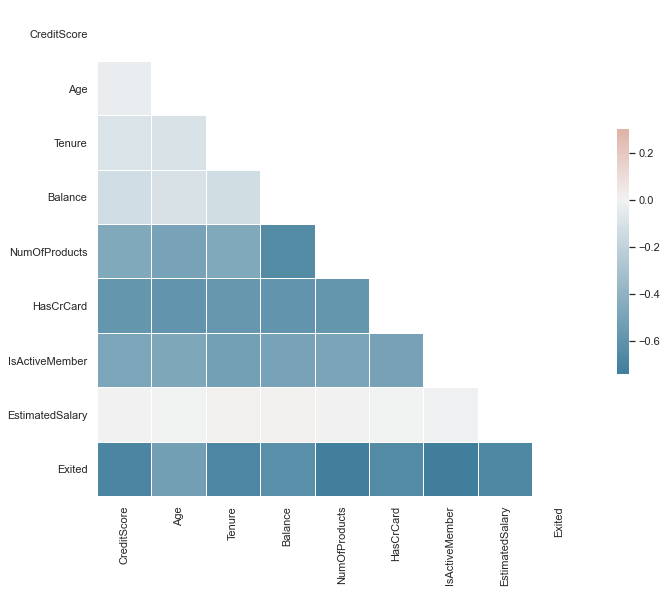

In [9]:
corr = bank_customers_data.corr(method ='kendall')

mask = np.triu(np.ones_like(corr,dtype=bool))

# set up matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

#generate a custom diverging colormap
cmap = sns.diverging_palette(230,20,as_cmap=True)

#draw the heatpmap ith the mask and correct aspect ratio
sns.heatmap(corr,mask=mask, cmap=cmap, vmax=.3,center=0,square=True,linewidths=.5,cbar_kws = {'shrink':.5})

In [10]:
### It was difficult to compare the values from the plot so we decided to sort them and compare.

corr.sort_values(by=['Exited'],ascending=False).iloc[0].sort_values(ascending=False)

Exited             1.000000
Age               -0.525119
Balance           -0.623371
HasCrCard         -0.652189
EstimatedSalary   -0.669936
Tenure            -0.681783
CreditScore       -0.686367
NumOfProducts     -0.728267
IsActiveMember    -0.738876
Name: Exited, dtype: float64

The count of each gender is:
 Male      5457
Female    4543
Name: Gender, dtype: int64 




[Text(0.5, 0, 'Gender'), Text(0, 0.5, 'Count')]

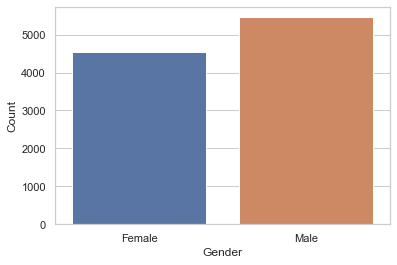

In [11]:
print("The count of each gender is:\n",bank_customers_data.Gender.value_counts(),"\n\n")
ax = sns.countplot(data=bank_customers_data, x='Gender')
ax.set_xticklabels(['Female','Male'])
ax.set(xlabel='Gender', ylabel='Count')

The count of each Customer Tenure is:
 2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64


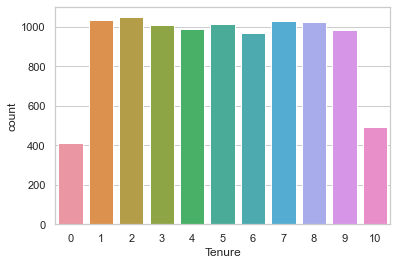

In [12]:
print("The count of each Customer Tenure is:\n",bank_customers_data.Tenure.value_counts())
ax = sns.countplot(data=bank_customers_data, x='Tenure')

The count of each type of Product is:
 1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64


[Text(0.5, 0, 'Product Numbers '), Text(0, 0.5, 'Count')]

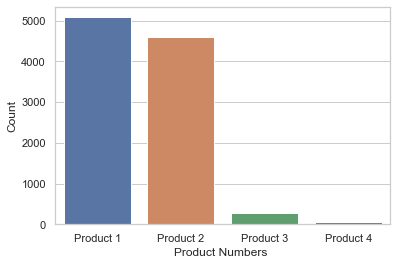

In [13]:
print("The count of each type of Product is:\n",bank_customers_data.NumOfProducts.value_counts())
ax = sns.countplot(data=bank_customers_data, x='NumOfProducts')
ax.set_xticklabels(['Product 1','Product 2',"Product 3","Product 4"])
ax.set(xlabel='Product Numbers ', ylabel='Count')

The count of each customer if they have Card is:
 1    7055
0    2945
Name: HasCrCard, dtype: int64


[Text(0.5, 0, 'Has a Card?'), Text(0, 0.5, 'Count')]

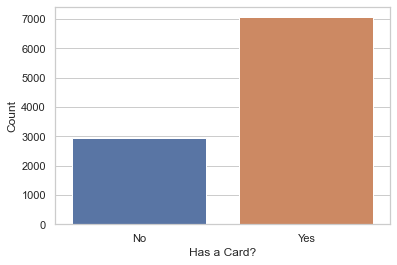

In [14]:
print("The count of each customer if they have Card is:\n", bank_customers_data.HasCrCard.value_counts())
ax = sns.countplot(data=bank_customers_data, x='HasCrCard')
ax.set_xticklabels(['No','Yes',])
ax.set(xlabel='Has a Card?', ylabel='Count')

The count of each customer if they are active Member is: 
(1 is Yes and 0 is No)
 1    5151
0    4849
Name: IsActiveMember, dtype: int64


[Text(0.5, 0, 'Is an active Member?'), Text(0, 0.5, 'Count')]

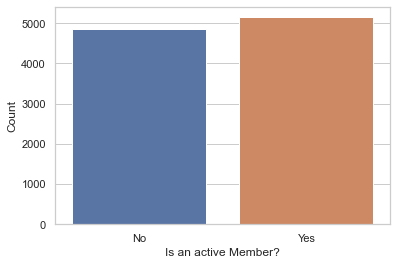

In [15]:
print("The count of each customer if they are active Member is: \n(1 is Yes and 0 is No)\n",bank_customers_data.IsActiveMember.value_counts())
ax = sns.countplot(data=bank_customers_data, x='IsActiveMember')
ax.set_xticklabels(['No','Yes',])
ax.set(xlabel='Is an active Member?', ylabel='Count')

The count of each customer if they are Excited is: 
(1 is Yes and 0 is No)
 0    7963
1    2037
Name: Exited, dtype: int64


[Text(0.5, 0, 'Is The Customer Excited?'), Text(0, 0.5, 'Count')]

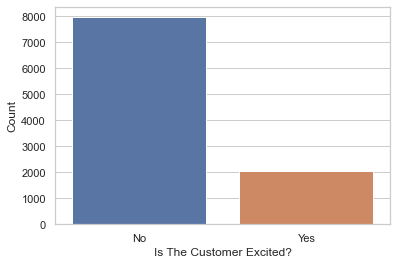

In [16]:
print("The count of each customer if they are Excited is: \n(1 is Yes and 0 is No)\n",bank_customers_data.Exited.value_counts())
ax = sns.countplot(data=bank_customers_data, x='Exited')
ax.set_xticklabels(['No','Yes',])
ax.set(xlabel='Is The Customer Excited?', ylabel='Count')

The count of each customer for different Locations (Country): 
(1 is Yes and 0 is No)
 France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


[Text(0.5, 0, 'Country'), Text(0, 0.5, 'Count')]

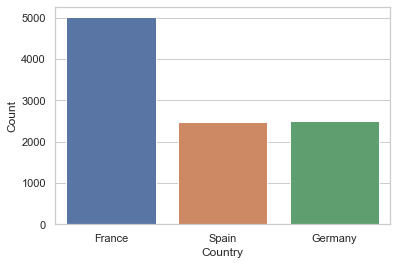

In [17]:
print("The count of each customer for different Locations (Country): \n(1 is Yes and 0 is No)\n",bank_customers_data.Geography.value_counts())
ax = sns.countplot(data=bank_customers_data, x='Geography')
ax.set(xlabel='Country', ylabel='Count')

<Figure size 504x504 with 0 Axes>

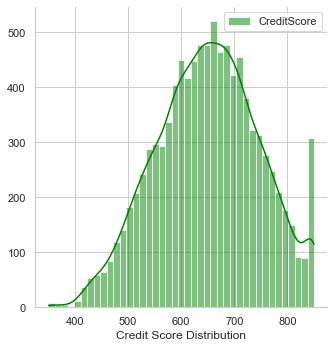

In [18]:
fig = plt.figure(figsize=(7,7))

ax = sns.displot(bank_customers_data.CreditScore, color='green',label='CreditScore', kde=True)
ax.set(xlabel = 'Credit Score Distribution', ylabel='')
plt.legend();

<Figure size 504x504 with 0 Axes>

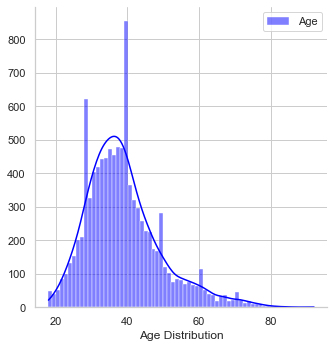

In [19]:
fig = plt.figure(figsize=(7,7))
ax = sns.displot(bank_customers_data.Age, color='blue',label='Age',kde='True')
ax.set(xlabel='Age Distribution', ylabel='')
plt.legend();

<Figure size 720x720 with 0 Axes>

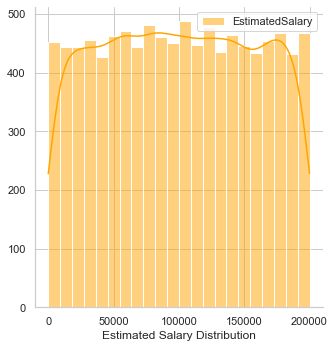

In [20]:
fig  = plt.figure(figsize=(10,10))
ax = sns.displot(bank_customers_data.EstimatedSalary,label='EstimatedSalary',color='orange',kde=True)
ax.set(xlabel='Estimated Salary Distribution', ylabel='')
plt.legend();

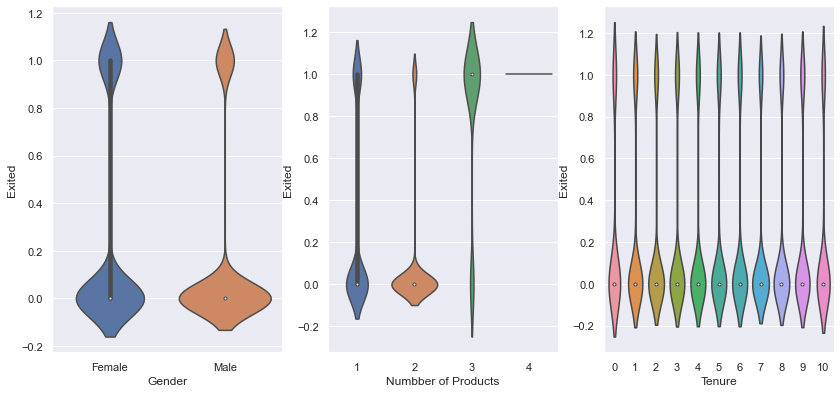

In [21]:
plt.figure(figsize=(14,14))
sns.set_theme(style='darkgrid')

plt.subplot(2,3,1)
ax = sns.violinplot(x='Gender',y='Exited',data=bank_customers_data)
ax.set_xticklabels(['Female','Male'])
ax.set(xlabel='Gender', ylabel='Exited')

plt.subplot(2,3,3)
sns.violinplot(x='Tenure',y='Exited',data=bank_customers_data)

plt.subplot(2,3,2)
ax = sns.violinplot(x='NumOfProducts',y='Exited',data=bank_customers_data)
ax.set(xlabel='Numbber of Products', ylabel='Exited')

plt.show()

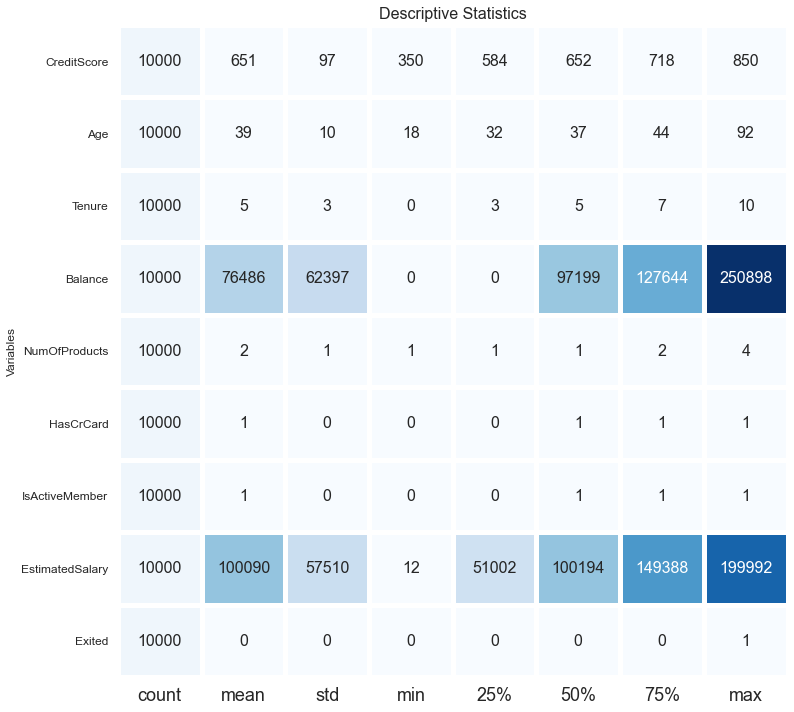

In [22]:
### Here we generate the descreptive stastics table and compare the values.
### We computed the mean,median,sd,min,max and the 4 quortiles.

desc = bank_customers_data.describe().T
df1 = pd.DataFrame(index=['CreditScore', 'Age',
                          'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 
                           'EstimatedSalary', 'Exited'], 
                   columns= ["count","mean","std","min",
                             "25%","50%","75%","max"], data= desc )

f,ax = plt.subplots(figsize=(12,12))

sns.heatmap(df1, annot=True,cmap = "Blues", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,
            annot_kws={"size": 16})

plt.xticks(size = 18)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("Variables")
plt.title("Descriptive Statistics", size = 16)
plt.show()

## Feature Engineering

In [23]:
### Here we convert Categorical Varibales to Numeric ones for processing.
le = LabelEncoder()
bank_customers_data['Geography'] = le.fit_transform(bank_customers_data['Geography'])
bank_customers_data['Gender'] = le.fit_transform(bank_customers_data['Gender'])

In [24]:
### Here we create Bins of Estimated Salary into 5 bins ( called as Estimated Salary Band)
bank_customers_data['EstimatedSalaryBand'] = pd.cut(bank_customers_data['EstimatedSalary'], 5)
bank_customers_data[['EstimatedSalaryBand', 
                     'Exited']].groupby(['EstimatedSalaryBand'],
                                        as_index=False).mean().sort_values(by='EstimatedSalaryBand',
                                                                           ascending=True)

,EstimatedSalaryBand,Exited
0,"(-188.401, 40007.76]",0.201535
1,"(40007.76, 80003.94]",0.198229
2,"(80003.94, 120000.12]",0.200591
3,"(120000.12, 159996.3]",0.202112
4,"(159996.3, 199992.48]",0.216148


In [35]:
## Here we allocate the generated bins on Estimated Salary.
## We use our unility package to do this procesing. 

bank_customers_data = utility.EstimatedSalary_FE(bank_customers_data)
bank_customers_data.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,EstimatedSalaryBand
0,619,0,0,42,2,0.00,1,1,1,2.0,1,"(80003.94, 120000.12]"
1,608,2,0,41,1,83807.86,1,0,1,2.0,0,"(80003.94, 120000.12]"
2,502,0,0,42,8,159660.80,3,1,0,2.0,1,"(80003.94, 120000.12]"
3,699,0,0,39,1,0.00,2,0,0,2.0,0,"(80003.94, 120000.12]"
4,850,2,0,43,2,125510.82,1,1,1,1.0,0,"(40007.76, 80003.94]"


In [36]:
### Displaying the binned values.

bank_customers_data.EstimatedSalary.unique()

array([2., 1., 3., 0., 4.])

In [37]:
### Here we create Bins of Balance into 5 bins (called as Balance Band)

bank_customers_data['BalanceBand'] = pd.cut(bank_customers_data['Balance'], 5)
bank_customers_data[['BalanceBand', 'Exited']].groupby(['BalanceBand'], as_index=False).mean().sort_values(by='BalanceBand', ascending=True)

,BalanceBand,Exited
0,"(-250.898, 50179.618]",0.142470
1,"(50179.618, 100359.236]",0.199609
2,"(100359.236, 150538.854]",0.257837
3,"(150538.854, 200718.472]",0.217486
4,"(200718.472, 250898.09]",0.593750


In [38]:
## Here we allocate the generated bins on Bank Balance.
## We use our unility package to do this procesing. 

bank_customers_data = utility.Balance_FE(bank_customers_data)
bank_customers_data.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,EstimatedSalaryBand,BalanceBand
0,619,0,0,42,2,0.0,1,1,1,2.0,1,"(80003.94, 120000.12]","(-250.898, 50179.618]"
1,608,2,0,41,1,3.0,1,0,1,2.0,0,"(80003.94, 120000.12]","(50179.618, 100359.236]"
2,502,0,0,42,8,5.0,3,1,0,2.0,1,"(80003.94, 120000.12]","(150538.854, 200718.472]"
3,699,0,0,39,1,0.0,2,0,0,2.0,0,"(80003.94, 120000.12]","(-250.898, 50179.618]"
4,850,2,0,43,2,4.0,1,1,1,1.0,0,"(40007.76, 80003.94]","(100359.236, 150538.854]"


In [39]:

## We don't need Balance band anymore so we drop it.

bank_customers_data.drop(['BalanceBand'],axis=1,inplace=True)

In [40]:
### Here we create Bins of Credit Score into 5 bins (called as Credit Score Band)

bank_customers_data['CreditScoreBand'] = pd.cut(bank_customers_data['CreditScore'], 5)
bank_customers_data[['CreditScoreBand', 'Exited']].groupby(['CreditScoreBand'], as_index=False).mean().sort_values(by='CreditScoreBand', ascending=True)

,CreditScoreBand,Exited
0,"(349.5, 450.0]",0.322751
1,"(450.0, 550.0]",0.214385
2,"(550.0, 650.0]",0.207780
3,"(650.0, 750.0]",0.192496
4,"(750.0, 850.0]",0.195870


In [41]:
## Here we allocate the generated bins on Credit Score.
## We use our unility package to do this procesing. 

bank_customers_data = utility.CreditScore_FE(bank_customers_data)
bank_customers_data.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,EstimatedSalaryBand,CreditScoreBand
0,2,0,0,42,2,0.0,1,1,1,2.0,1,"(80003.94, 120000.12]","(550.0, 650.0]"
1,2,2,0,41,1,3.0,1,0,1,2.0,0,"(80003.94, 120000.12]","(550.0, 650.0]"
2,1,0,0,42,8,5.0,3,1,0,2.0,1,"(80003.94, 120000.12]","(450.0, 550.0]"
3,3,0,0,39,1,0.0,2,0,0,2.0,0,"(80003.94, 120000.12]","(650.0, 750.0]"
4,4,2,0,43,2,4.0,1,1,1,1.0,0,"(40007.76, 80003.94]","(750.0, 850.0]"


In [42]:

## We don't need Credit Score band anymore so we drop it.

bank_customers_data.drop('CreditScoreBand',axis=1,inplace=True)

In [43]:
### Here we begin with our modelling. We seperate the dependent variable from the independent ones. 

X = bank_customers_data.drop('Exited',axis=1)
Y = bank_customers_data['Exited']